In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math, copy

In [2]:
#Using the flowers dataset from  sklearn
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [4]:
x= df['sepal length (cm)'].values
y=df['petal length (cm)'].values

In [5]:
x_train , x_test,y_train ,y_test = x[:105],x[105:],y[:105],y[105:]

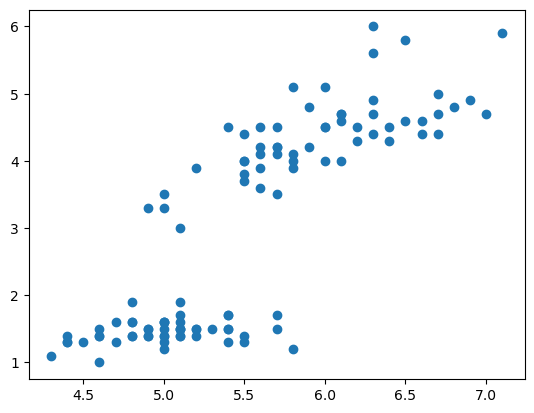

In [6]:
plt.scatter(x=x_train,y=y_train)
plt.show()

In [7]:
#computing the cost function
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = (1 / (2 * m) )* cost

    return total_cost

In [8]:
#implememting gradient dessent algorithm
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw/m  
    dj_db = dj_db/m
        
    return dj_dw, dj_db

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    print(w)
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - (alpha * dj_db )                          
        w = w -( alpha * dj_dw )                          

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [44]:
# initialize parameters
w_init = 1
b_init = 0
# some gradient descent settings
iterations =1450
tmp_alpha = 0.00001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:.4f},{b_final:.4f})")

1
Iteration    0: Cost 3.73e+00  dj_dw:  1.350e+01, dj_db:  2.520e+00   w:  9.999e-01, b:-2.52000e-05
Iteration  145: Cost 3.47e+00  dj_dw:  1.289e+01, dj_db:  2.411e+00   w:  9.807e-01, b:-3.59896e-03
Iteration  290: Cost 3.23e+00  dj_dw:  1.231e+01, dj_db:  2.307e+00   w:  9.625e-01, b:-7.01818e-03
Iteration  435: Cost 3.01e+00  dj_dw:  1.175e+01, dj_db:  2.207e+00   w:  9.450e-01, b:-1.02898e-02
Iteration  580: Cost 2.81e+00  dj_dw:  1.122e+01, dj_db:  2.112e+00   w:  9.284e-01, b:-1.34206e-02
Iteration  725: Cost 2.63e+00  dj_dw:  1.071e+01, dj_db:  2.022e+00   w:  9.125e-01, b:-1.64167e-02
Iteration  870: Cost 2.47e+00  dj_dw:  1.023e+01, dj_db:  1.935e+00   w:  8.973e-01, b:-1.92844e-02
Iteration 1015: Cost 2.32e+00  dj_dw:  9.765e+00, dj_db:  1.852e+00   w:  8.828e-01, b:-2.20294e-02
Iteration 1160: Cost 2.18e+00  dj_dw:  9.324e+00, dj_db:  1.773e+00   w:  8.690e-01, b:-2.46573e-02
Iteration 1305: Cost 2.06e+00  dj_dw:  8.902e+00, dj_db:  1.698e+00   w:  8.558e-01, b:-2.71733e-0

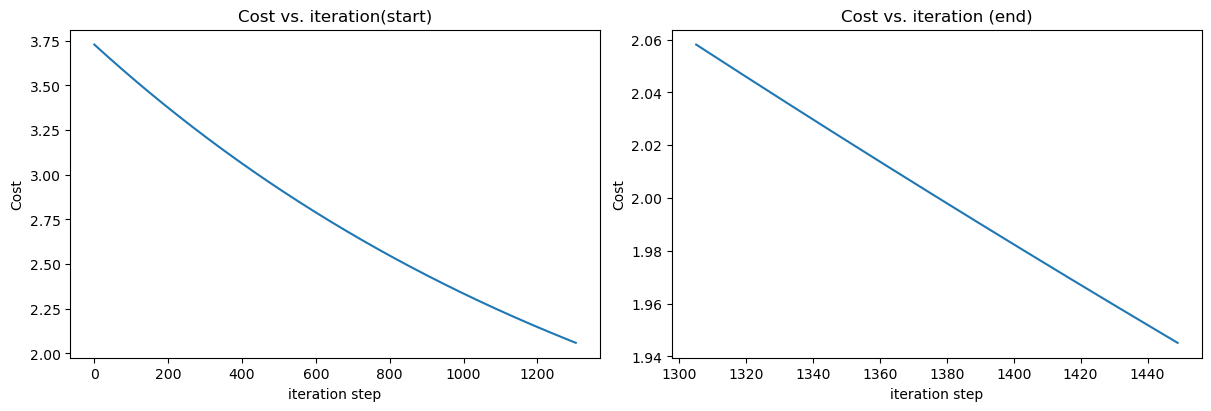

In [48]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1305])
ax2.plot(1305 + np.arange(len(J_hist[1305:])), J_hist[1305:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [45]:
def predict(X,w,b):
    pre = (X*w)+b
    return pre
def mse(y_predict,y_test,n):
    ms = np.sum((y_predict-y_test)**2)
    return ms/(n)
    
y_predict =np.round(predict(x_test,w_final,b_final),1)
y_predict

array([6.4, 4.1, 6.1, 5.6, 6. , 5.5, 5.4, 5.7, 4.8, 4.9, 5.4, 5.5, 6.5,
       6.5, 5. , 5.8, 4.7, 6.5, 5.3, 5.6, 6. , 5.2, 5.1, 5.4, 6. , 6.2,
       6.6, 5.4, 5.3, 5.1, 6.5, 5.3, 5.4, 5. , 5.8, 5.6, 5.8, 4.9, 5.7,
       5.6, 5.6, 5.3, 5.5, 5.2, 4.9])

In [46]:
MSE = np.square(np.subtract(y_test,y_predict)).mean()
MSE

0.07044444444444442

In [23]:

df1 = pd.DataFrame({"Actual":y_test.squeeze(),"Predict":y_predict.squeeze()})
df1

,Actual,Predict
0,6.6,6.6
1,4.5,4.3
2,6.3,6.4
3,5.8,5.8
4,6.1,6.3
5,5.1,5.7
6,5.3,5.6
7,5.5,5.9
8,5.0,5.0
9,5.1,5.0
